#pips

In [ ]:
!pip install openpyxl
!pip install pygam


#Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve, auc
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
#from pygam import LogisticGAM, s, te  # For GAM (Generalized Additive Models)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib


#Data

In [ ]:
data = joblib.load('/content/drive/MyDrive/Bankruptcy Prediction Data/Prepared Dataset/Dataset.pkl')

print(data.head())

X = data.drop(columns=['result'])
y = data['result']

   Profitability Ratios (Return from Sales) EBIT/Sales last avail. Year  \
0                                           1.281861                      
1                                           0.022043                      
2                                           3.210585                      
3                                          51.385155                      
4                                          37.085847                      

   Profitability Ratios (Return from Sales) EBIT/Sales last year -1  \
0                                          -0.073507                  
1                                          -0.027587                  
2                                          -2.198620                  
3                                          -2.196863                  
4                                          -2.354131                  

   Profitability Ratios (Return from Sales) EBIT/Sales last year -2  \
0                                           0.03703

In [ ]:
data.shape

(255919, 61)

In [ ]:

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Models

In [ ]:
#criterion='gini' for tree based
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", C=1, penalty="l1", max_iter=1000, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=3, subsample=0.8, learning_rate=0.1, random_state=42),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
  }




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cv_results = {model_name: [] for model_name in models.keys()}
roc_curves_cv = {model_name: [] for model_name in models.keys()}
pr_curves_cv = {model_name: [] for model_name in models.keys()}

#Fitting models and Evaluations

Training Logistic Regression with Cross-Validation
Mean Threshold for Logistic Regression: 0.76
Training Gradient Boosting with Cross-Validation
Mean Threshold for Gradient Boosting: 0.33
Training Linear Discriminant Analysis (LDA) with Cross-Validation
Mean Threshold for Linear Discriminant Analysis (LDA): 0.18

Cross-validation Metrics for Logistic Regression:
  Fold 1:
    Accuracy: 0.9211
    Precision: 0.6369
    Recall: 0.6710
    F1: 0.6535
    ROC AUC: 0.9333
    PR AUC: 0.7013
    Class Accuracies: {'non_bankrupt': 0.9523202671822816, 'bankrupt': 0.671015514809591}
  Fold 2:
    Accuracy: 0.9172
    Precision: 0.6119
    Recall: 0.6904
    F1: 0.6488
    ROC AUC: 0.9311
    PR AUC: 0.6869
    Class Accuracies: {'non_bankrupt': 0.9454209878713307, 'bankrupt': 0.6904090267983075}
  Fold 3:
    Accuracy: 0.9230
    Precision: 0.6534
    Recall: 0.6495
    F1: 0.6515
    ROC AUC: 0.9329
    PR AUC: 0.6844
    Class Accuracies: {'non_bankrupt': 0.9570662682369485, 'bankrupt': 0.649

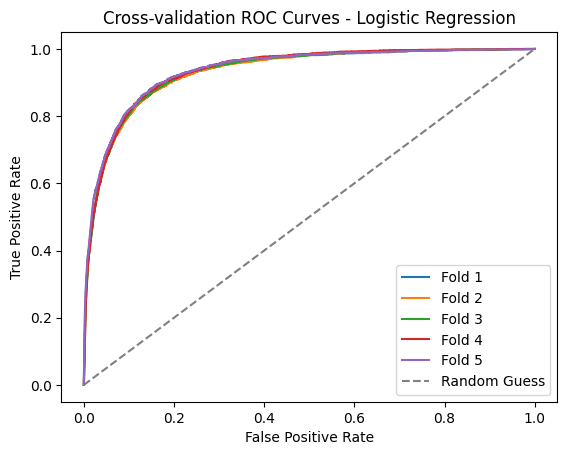

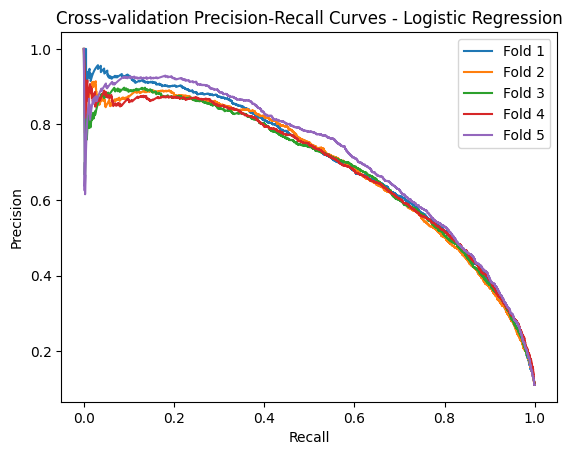


Cross-validation Metrics for Gradient Boosting:
  Fold 1:
    Accuracy: 0.9434
    Precision: 0.7700
    Recall: 0.6978
    F1: 0.7321
    ROC AUC: 0.9570
    PR AUC: 0.8065
    Class Accuracies: {'non_bankrupt': 0.9740288275619616, 'bankrupt': 0.6978138222849083}
  Fold 2:
    Accuracy: 0.9351
    Precision: 0.6949
    Recall: 0.7387
    F1: 0.7161
    ROC AUC: 0.9549
    PR AUC: 0.7948
    Class Accuracies: {'non_bankrupt': 0.9595711021269115, 'bankrupt': 0.7387165021156559}
  Fold 3:
    Accuracy: 0.9378
    Precision: 0.7153
    Recall: 0.7292
    F1: 0.7222
    ROC AUC: 0.9572
    PR AUC: 0.8003
    Class Accuracies: {'non_bankrupt': 0.9638337141852699, 'bankrupt': 0.7291960507757405}
  Fold 4:
    Accuracy: 0.9334
    Precision: 0.6700
    Recall: 0.7867
    F1: 0.7236
    ROC AUC: 0.9592
    PR AUC: 0.8059
    Class Accuracies: {'non_bankrupt': 0.9517050448233433, 'bankrupt': 0.7866713681241185}
  Fold 5:
    Accuracy: 0.9401
    Precision: 0.7300
    Recall: 0.7292
    F1: 0.7

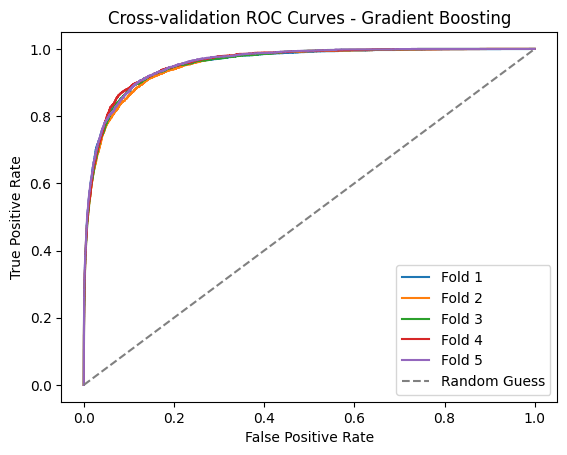

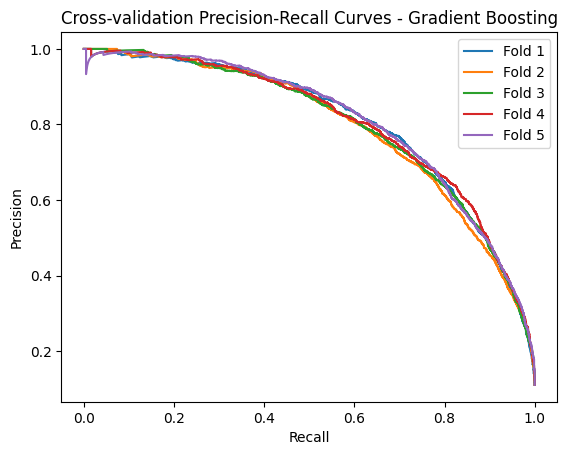


Cross-validation Metrics for Linear Discriminant Analysis (LDA):
  Fold 1:
    Accuracy: 0.9153
    Precision: 0.6128
    Recall: 0.6396
    F1: 0.6259
    ROC AUC: 0.9153
    PR AUC: 0.6657
    Class Accuracies: {'non_bankrupt': 0.949639655475479, 'bankrupt': 0.6396332863187588}
  Fold 2:
    Accuracy: 0.9143
    Precision: 0.6129
    Recall: 0.6164
    F1: 0.6146
    ROC AUC: 0.9133
    PR AUC: 0.6494
    Class Accuracies: {'non_bankrupt': 0.9514853225522939, 'bankrupt': 0.616361071932299}
  Fold 3:
    Accuracy: 0.9123
    Precision: 0.5965
    Recall: 0.6439
    F1: 0.6193
    ROC AUC: 0.9163
    PR AUC: 0.6481
    Class Accuracies: {'non_bankrupt': 0.9457285990507998, 'bankrupt': 0.6438645980253879}
  Fold 4:
    Accuracy: 0.9126
    Precision: 0.5969
    Recall: 0.6495
    F1: 0.6221
    ROC AUC: 0.9204
    PR AUC: 0.6561
    Class Accuracies: {'non_bankrupt': 0.9453330989629108, 'bankrupt': 0.6495063469675599}
  Fold 5:
    Accuracy: 0.9145
    Precision: 0.6092
    Recall: 0.6

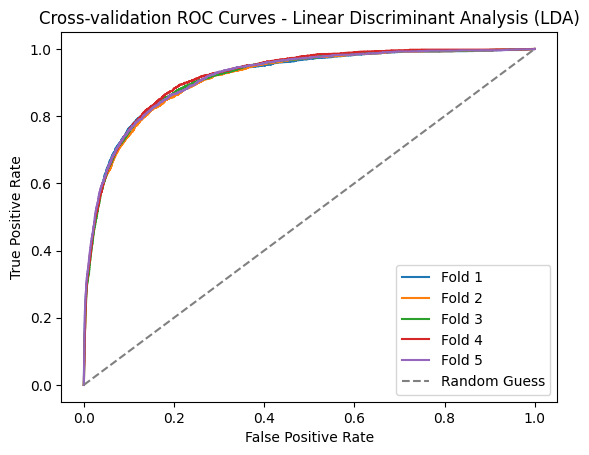

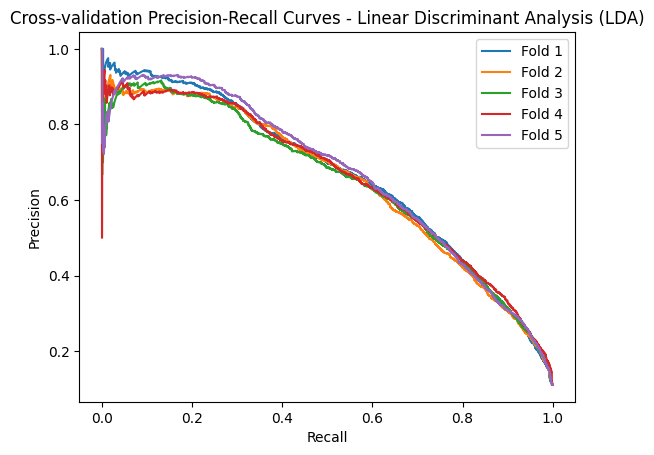


Final Training for Logistic Regression

Final Metrics for Logistic Regression:
  Accuracy: 0.6521
  Precision: 0.2378
  Recall: 0.9700
  F1 Score: 0.3819
  ROC AUC: 0.9369
  PR AUC: 0.7084
  Class Accuracies: {'non_bankrupt': 0.6124802249956055, 'bankrupt': 0.9700282087447109}


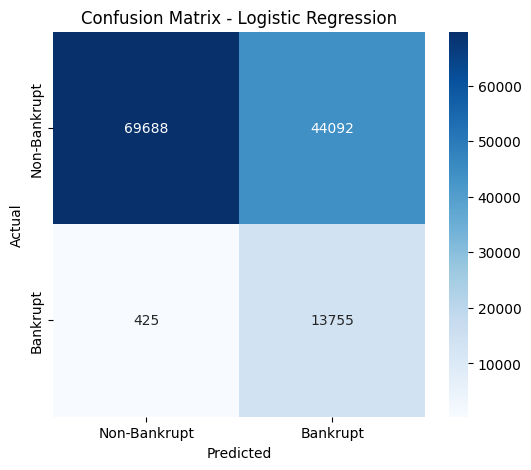

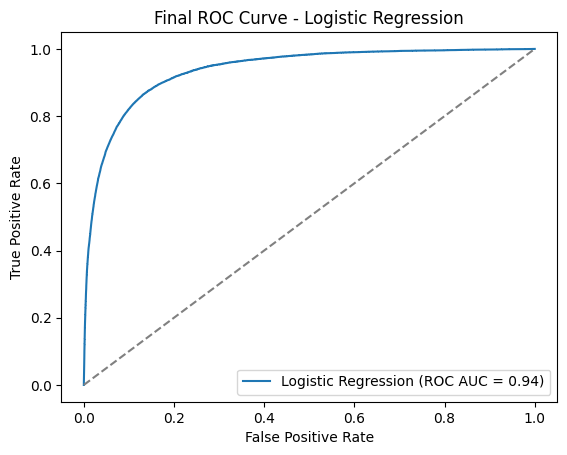

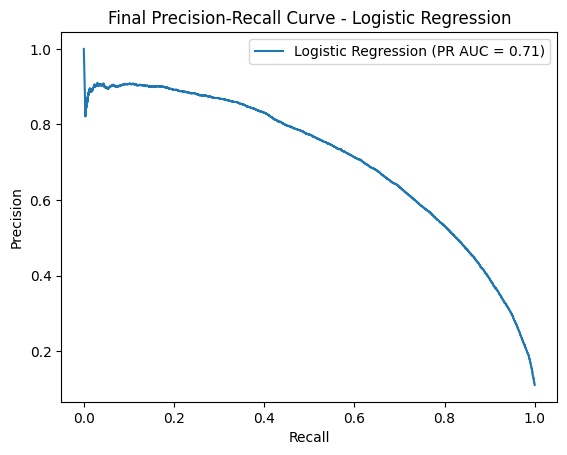


Final Training for Gradient Boosting

Final Metrics for Gradient Boosting:
  Accuracy: 0.9192
  Precision: 0.5957
  Recall: 0.8417
  F1 Score: 0.6976
  ROC AUC: 0.9599
  PR AUC: 0.8118
  Class Accuracies: {'non_bankrupt': 0.9288099841799965, 'bankrupt': 0.8416784203102962}


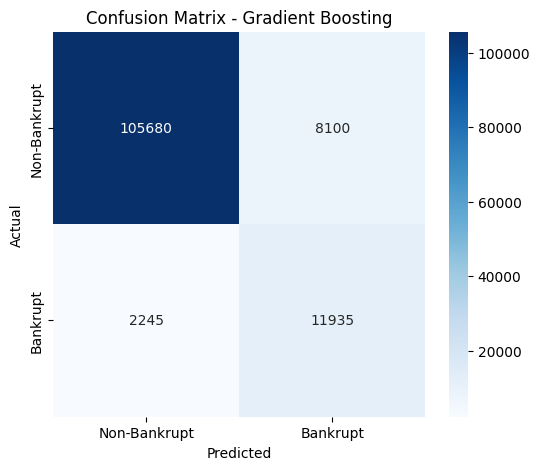

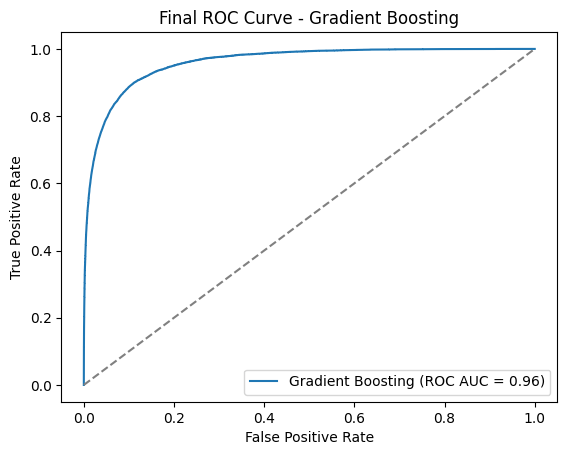

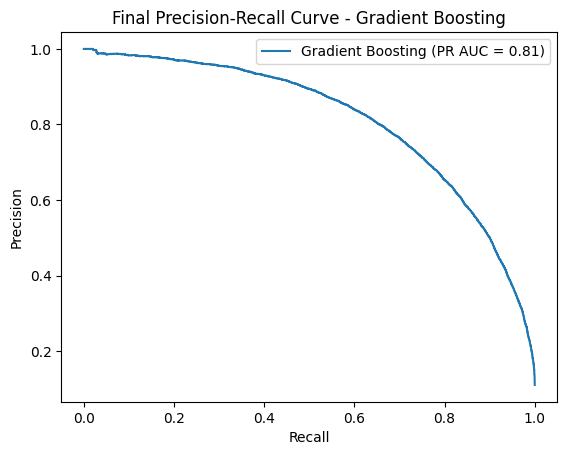


Final Training for Linear Discriminant Analysis (LDA)

Final Metrics for Linear Discriminant Analysis (LDA):
  Accuracy: 0.9151
  Precision: 0.6105
  Recall: 0.6466
  F1 Score: 0.6280
  ROC AUC: 0.9201
  PR AUC: 0.6703
  Class Accuracies: {'non_bankrupt': 0.948584988574442, 'bankrupt': 0.6466149506346968}


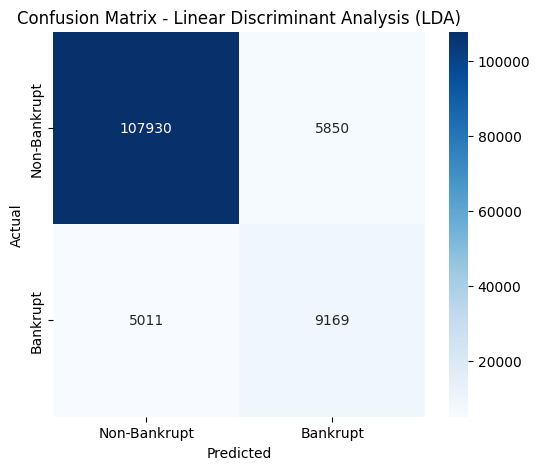

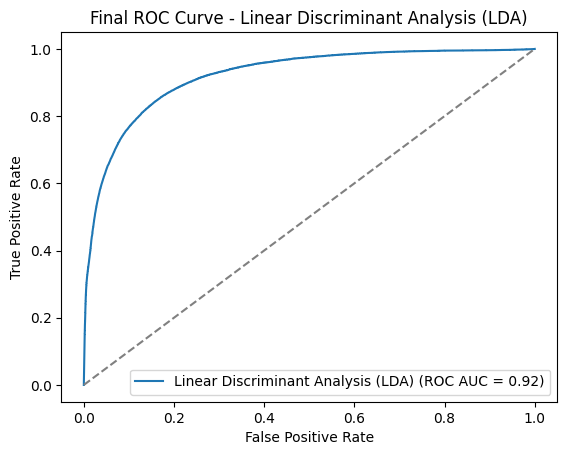

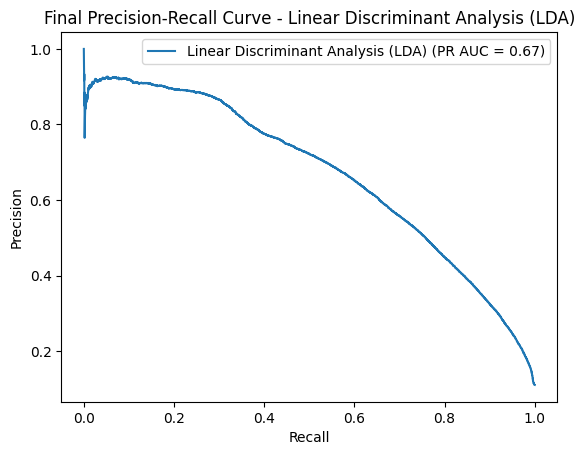

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name} with Cross-Validation")
    thresholds = []

    for fold_idx, (train_index, val_index) in enumerate(cv.split(X_train, y_train)):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train.values[train_index], y_train.values[val_index]

        model.fit(X_fold_train, y_fold_train)

        y_fold_proba = model.predict_proba(X_fold_val)[:, 1]
        best_threshold = 0.5
        best_f1 = 0

        for threshold in np.arange(0.1, 1.0, 0.01):
            y_fold_pred = (y_fold_proba >= threshold).astype(int)
            f1 = f1_score(y_fold_val, y_fold_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

        thresholds.append(best_threshold)

        y_fold_pred = (y_fold_proba >= best_threshold).astype(int)

        # Metrics
        accuracy = accuracy_score(y_fold_val, y_fold_pred)
        precision = precision_score(y_fold_val, y_fold_pred)
        recall = recall_score(y_fold_val, y_fold_pred)
        f1 = f1_score(y_fold_val, y_fold_pred)
        roc_auc = roc_auc_score(y_fold_val, y_fold_proba)

        conf_matrix = confusion_matrix(y_fold_val, y_fold_pred)
        class_acc = {
            "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
            "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
        }
        pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_fold_val, y_fold_proba)
        pr_auc = auc(pr_curve_recall, pr_curve_precision)

        cv_results[model_name].append({
            "Fold": fold_idx + 1,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
            "Class Accuracies": class_acc
        })

        #curves
        fpr, tpr, _ = roc_curve(y_fold_val, y_fold_proba)
        roc_curves_cv[model_name].append((fpr, tpr))
        pr_curves_cv[model_name].append((pr_curve_precision, pr_curve_recall))

    #mean threshold
    mean_threshold = np.mean(thresholds)
    print(f"Mean Threshold for {model_name}: {mean_threshold:.2f}")

# Display Cross-validation Metrics
for model_name in models.keys():
    print(f"\nCross-validation Metrics for {model_name}:")
    for fold_metrics in cv_results[model_name]:
        print(f"  Fold {fold_metrics['Fold']}:")
        for metric, value in fold_metrics.items():
            if metric != "Fold" and metric != "Class Accuracies":
                print(f"    {metric}: {value:.4f}")
        print(f"    Class Accuracies: {fold_metrics['Class Accuracies']}")

    # Plot cross-validation ROC and PR curves
    plt.figure()
    for fold_idx, (fpr, tpr) in enumerate(roc_curves_cv[model_name]):
        plt.plot(fpr, tpr, label=f"Fold {fold_idx + 1}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
    plt.title(f"Cross-validation ROC Curves - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    for fold_idx, (precision, recall) in enumerate(pr_curves_cv[model_name]):
        plt.plot(recall, precision, label=f"Fold {fold_idx + 1}")
    plt.title(f"Cross-validation Precision-Recall Curves - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

# Final Model Training and Evaluation
final_results = {}
roc_curves_final = {}
pr_curves_final = {}

for model_name, model in models.items():
    print(f"\nFinal Training for {model_name}")
    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Use the mean threshold from CV
    mean_threshold = np.mean(thresholds)
    y_test_pred = (y_test_proba >= mean_threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_acc = {
        "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
        "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
    }
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Save results
    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Class Accuracies": class_acc
    }

    # Display final metrics
    print(f"\nFinal Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  PR AUC: {pr_auc:.4f}")
    print(f"  Class Accuracies: {class_acc}")

     # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankrupt', 'Bankrupt'],
                yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Save final curves
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_curves_final[model_name] = (fpr, tpr)
    pr_curves_final[model_name] = (pr_curve_precision, pr_curve_recall)

    # Plot final curves
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"Final ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"{model_name} (PR AUC = {pr_auc:.2f})")
    plt.title(f"Final Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()






#Saving models

Saving

In [ ]:
import joblib
import os
os.makedirs("saved_models", exist_ok=True)
for model_name, model in models.items():
    model_path = f"/content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/{model_name}.pkl"
    joblib.dump(model, model_path)



#Loading saved models

In [ ]:
import os
loaded_models = {}
for model_name in models.keys():
    model_path = f"/content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/{model_name}.pkl"
    if os.path.exists(model_path):
        loaded_models[model_name] = joblib.load(model_path)
        print(f"{model_name} loaded from {model_path}.")
    else:
        print(f"{model_name} not found in {model_path}, please train the model.")


Logistic Regression loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/Logistic Regression.pkl.
Random Forest loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/Random Forest.pkl.
Decision Tree loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/Decision Tree.pkl.
KNN loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/KNN.pkl.
Gradient Boosting loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/Gradient Boosting.pkl.
Extra Trees loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/Extra Trees.pkl.
Linear Discriminant Analysis (LDA) loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/Linear Discriminant Analysis (LDA).pkl.



Evaluating Logistic Regression on Test Data

Metrics for Logistic Regression:
  Accuracy: 0.8501
  Precision: 0.4169
  Recall: 0.8847
  F1 Score: 0.5667
  ROC AUC: 0.9369
  PR AUC: 0.7084
  Class Accuracies: {'non_bankrupt': 0.8457901212866936, 'bankrupt': 0.8846967559943583}


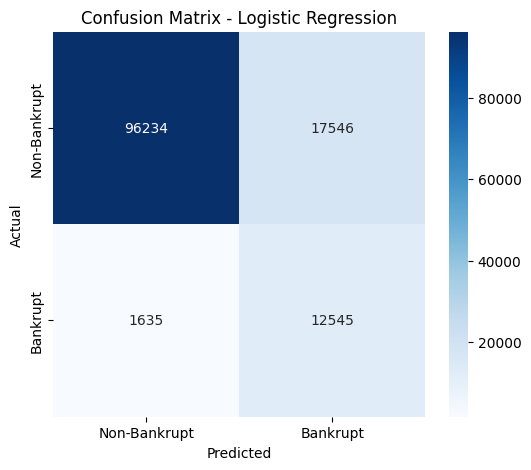

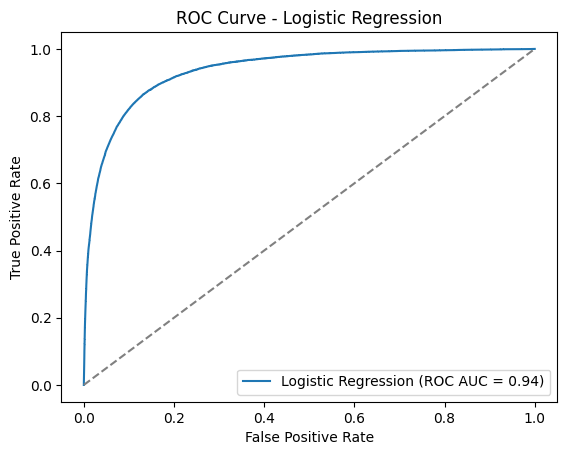

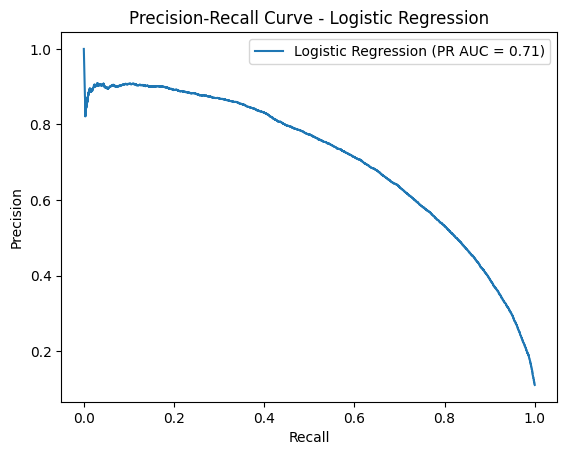


Evaluating Random Forest on Test Data

Metrics for Random Forest:
  Accuracy: 0.9409
  Precision: 0.7595
  Recall: 0.6827
  F1 Score: 0.7190
  ROC AUC: 0.9605
  PR AUC: 0.8025
  Class Accuracies: {'non_bankrupt': 0.9730532606785024, 'bankrupt': 0.6826516220028209}


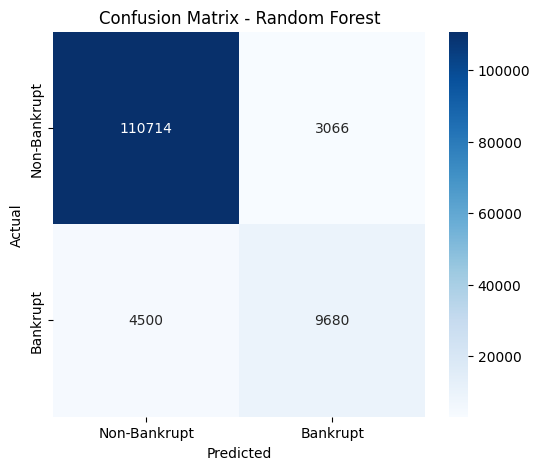

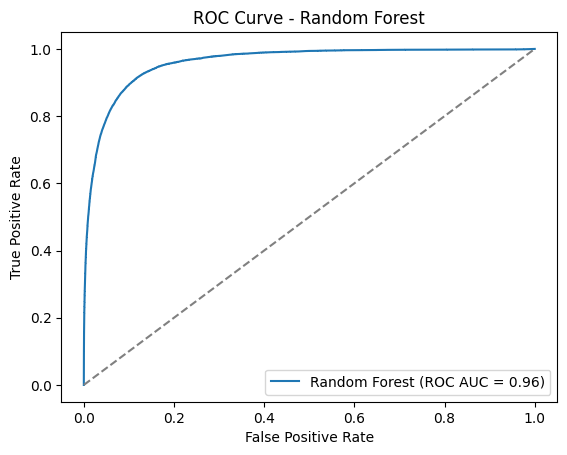

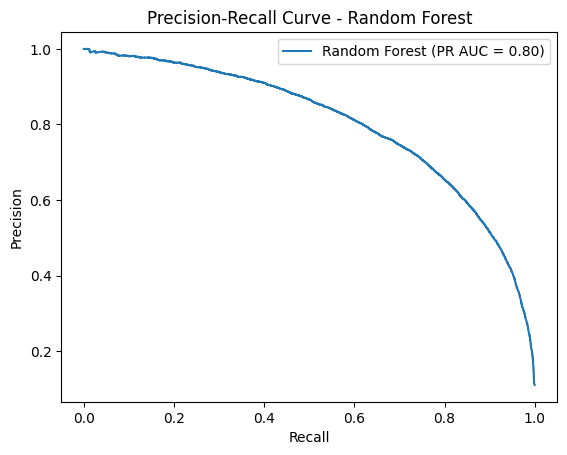


Evaluating Decision Tree on Test Data

Metrics for Decision Tree:
  Accuracy: 0.9115
  Precision: 0.5832
  Recall: 0.7057
  F1 Score: 0.6386
  ROC AUC: 0.7699
  PR AUC: 0.4573
  Class Accuracies: {'non_bankrupt': 0.9371506415890315, 'bankrupt': 0.7057122708039493}


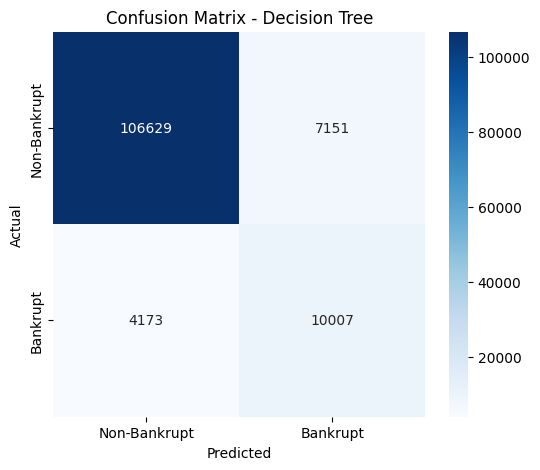

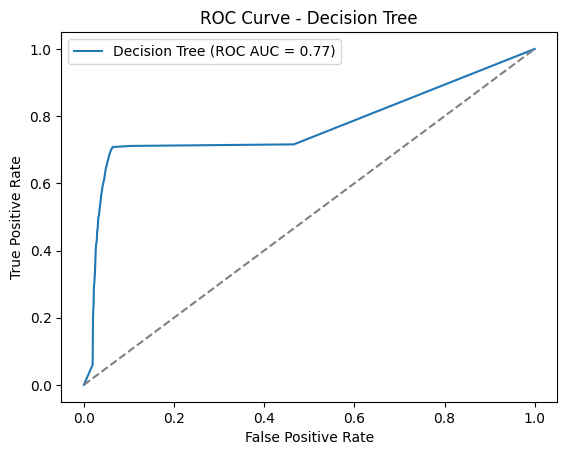

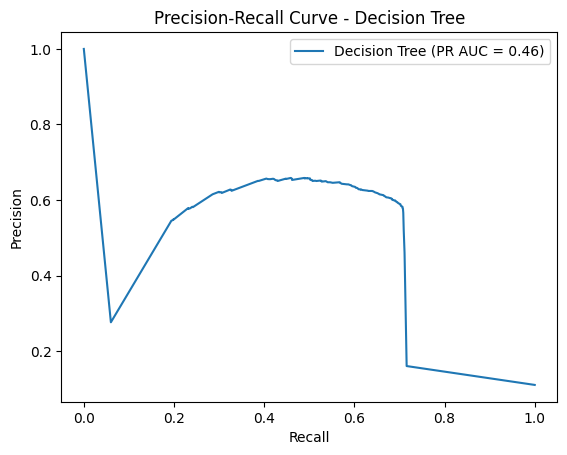


Evaluating KNN on Test Data

Metrics for KNN:
  Accuracy: 0.9286
  Precision: 0.7478
  Recall: 0.5372
  F1 Score: 0.6252
  ROC AUC: 0.8847
  PR AUC: 0.7030
  Class Accuracies: {'non_bankrupt': 0.9774213394269643, 'bankrupt': 0.5371650211565585}


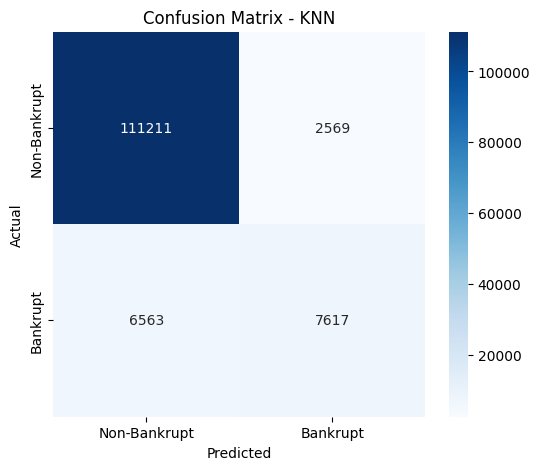

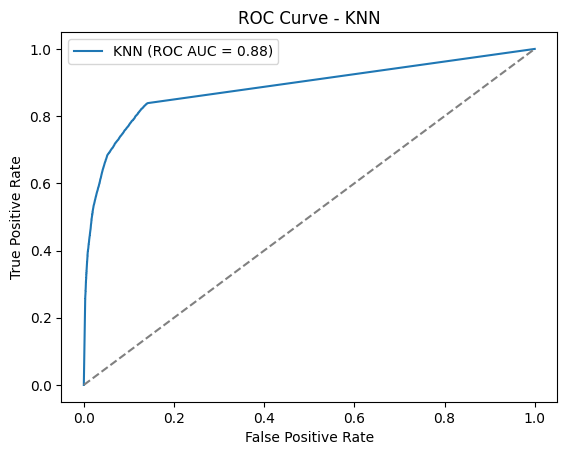

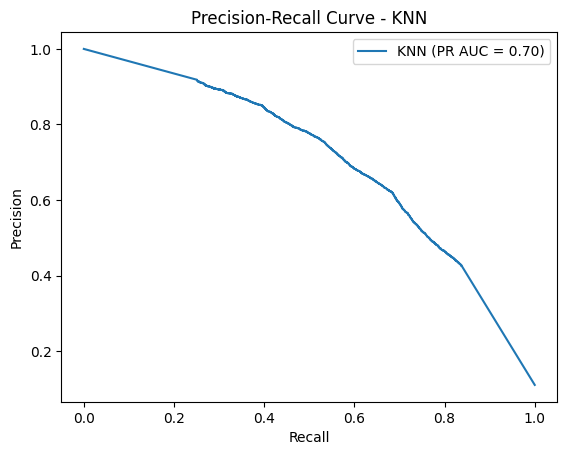


Evaluating Gradient Boosting on Test Data

Metrics for Gradient Boosting:
  Accuracy: 0.9437
  Precision: 0.8156
  Recall: 0.6360
  F1 Score: 0.7147
  ROC AUC: 0.9599
  PR AUC: 0.8118
  Class Accuracies: {'non_bankrupt': 0.9820794515732114, 'bankrupt': 0.635966149506347}


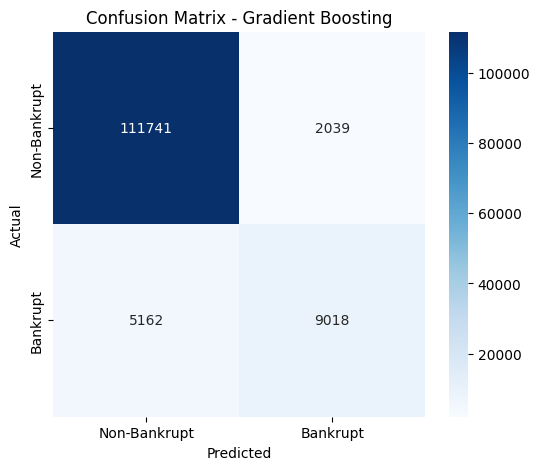

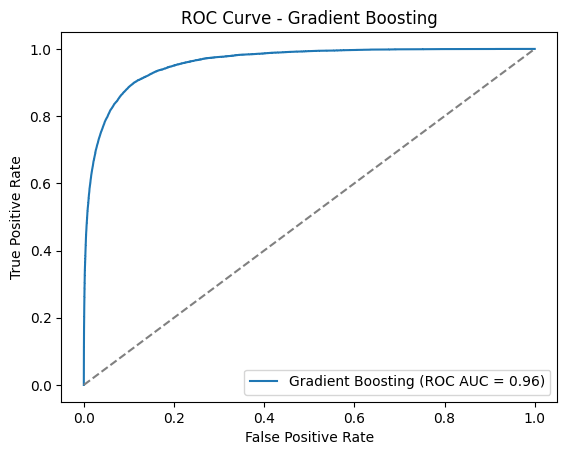

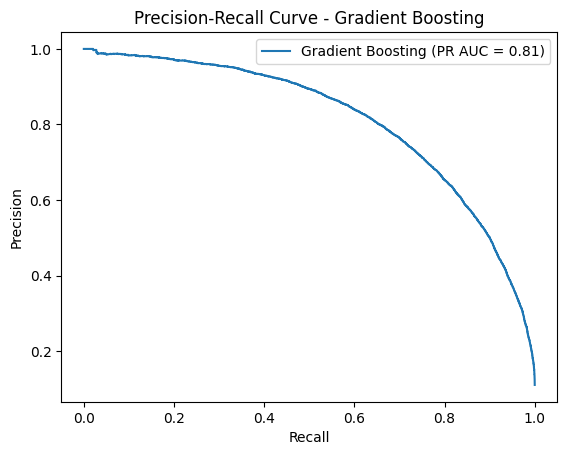


Evaluating Extra Trees on Test Data

Metrics for Extra Trees:
  Accuracy: 0.8966
  Precision: 0.5212
  Recall: 0.8200
  F1 Score: 0.6373
  ROC AUC: 0.9437
  PR AUC: 0.7345
  Class Accuracies: {'non_bankrupt': 0.9061082791351731, 'bankrupt': 0.8199576868829337}


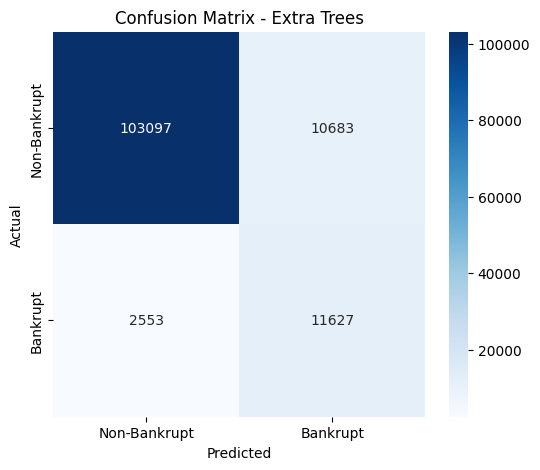

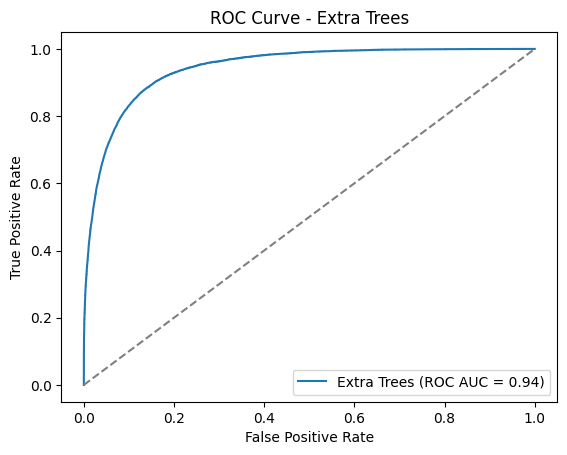

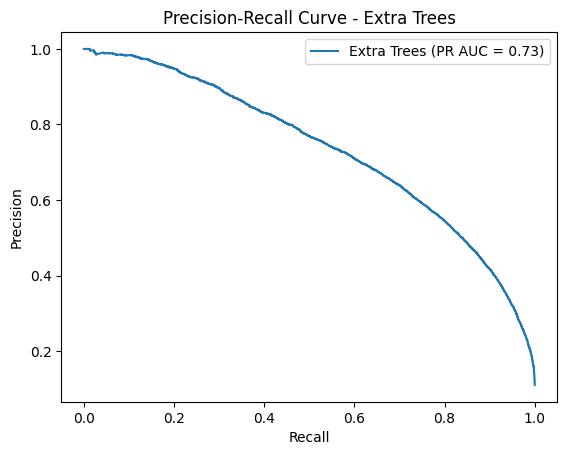


Evaluating Linear Discriminant Analysis (LDA) on Test Data

Metrics for Linear Discriminant Analysis (LDA):
  Accuracy: 0.9177
  Precision: 0.8592
  Recall: 0.3073
  F1 Score: 0.4527
  ROC AUC: 0.9201
  PR AUC: 0.6703
  Class Accuracies: {'non_bankrupt': 0.9937247319388293, 'bankrupt': 0.3073342736248237}


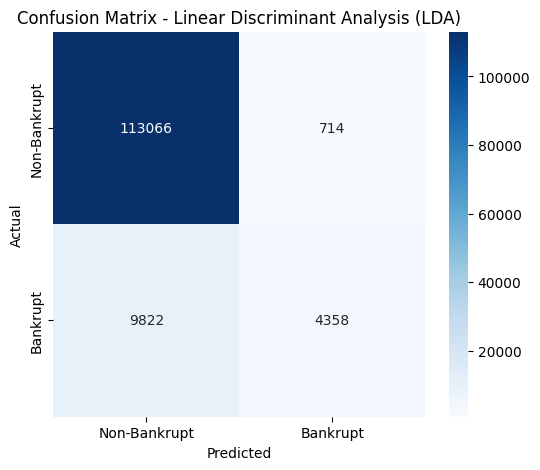

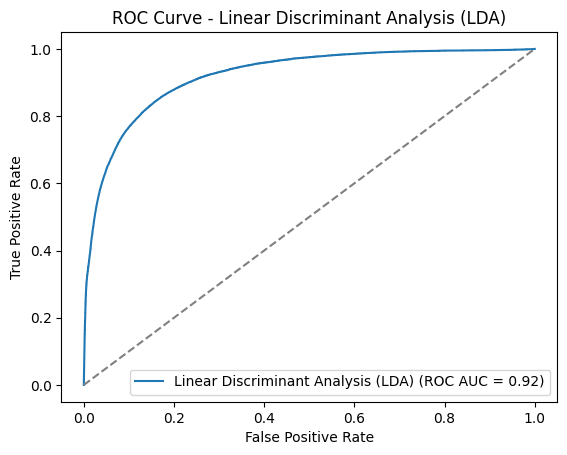

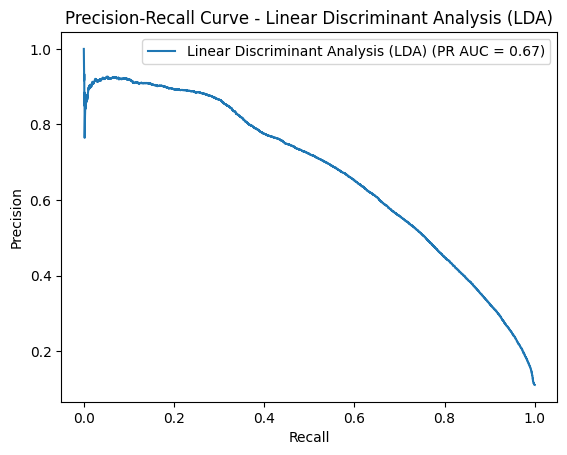

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Re-evaluate saved models
final_results = {}
pr_curves_final = {}
roc_curves_final = {}
for model_name, model in loaded_models.items():
    print(f"\nEvaluating {model_name} on Test Data")

    y_test_proba = model.predict_proba(X_test)[:, 1]  # Assuming predict_proba is available
    y_test_pred = (y_test_proba >= 0.5).astype(int)  # Default threshold 0.5

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_acc = {
        "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
        "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
    }
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Store results
    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Class Accuracies": class_acc
    }

    # Display metrics
    print(f"\nMetrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  PR AUC: {pr_auc:.4f}")
    print(f"  Class Accuracies: {class_acc}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankrupt', 'Bankrupt'],
                yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # Plot PR Curve
    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"{model_name} (PR AUC = {pr_auc:.2f})")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()


#Feature Importance

In [ ]:
# Feature Importance Storage
feature_importance_results = {}

# Compute Feature Importance for Each Model after Cross-Validation and Evaluation
for model_name, model in models.items():
    # Check if model supports feature importance
    if model_name in ["Random Forest", "Decision Tree", "Extra Trees"]:
        # Feature importance provided directly
        importance = model.feature_importances_
    elif model_name == "Logistic Regression":
        # Absolute value of coefficients for Logistic Regression
        importance = np.abs(model.coef_).flatten()
    else:
        # Models that do not support feature importance directly
        importance = None
        print(f"Feature importance is not supported for {model_name}.")

    # If feature importance is available, process and visualize it
    if importance is not None:
        feature_importance_results[model_name] = importance

        # Create a DataFrame for feature importance and sort by importance
        feature_importance_df = pd.DataFrame({
            "Feature": X.columns,
            "Importance": importance
        }).sort_values(by="Importance", ascending=False)

        top_features = feature_importance_df


        # Display the top 20 features
        print(f"\nTop 20 Features for {model_name}:")
        print(top_features.to_string(index=False))



Top 20 Features for Logistic Regression:
                                                                                      Feature  Importance
                      Liquidity Ratios (Current Liabilities − Cash)/Total Assets last year -2    1.679721
                                                Current Liabilities/Total Assets last year -2    1.510935
                                            Long-Term Debt-to-Total-Assets Ratio last year -2    1.348304
         Profitability Ratios (Return on Investment) Net Profit/Total Assets last avail. Year    1.237948
                                                             Equity/Total Assets last year -2    1.091995
                              Solvency Ratios Total Liabilities/Total Assets last avail. Year    1.062091
                                                      Equity/Total Assets last available year    1.015534
                                  Solvency Ratios Total Liabilities/Total Assets last year -2    0.953953
    

In [ ]:
from sklearn.inspection import permutation_importance
#"Gradient Boosting", "Generalized Linear Model (GLM)", "KNN", "Naive Bayes",
for model_name, model in models.items():
    if model_name in ["Linear Discriminant Analysis (LDA)" ]:
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        importance = result.importances_mean
        feature_importance_df = pd.DataFrame({
            "Feature": X.columns,
            "Importance": importance
        }).sort_values(by="Importance", ascending=False)


        top_features = feature_importance_df


        print(f"\nTop 20 Features for {model_name}:")
        print(top_features.to_string(index=False))



Top 20 Features for Linear Discriminant Analysis (LDA):
                                                                                      Feature    Importance
                                            Long-Term Debt-to-Total-Assets Ratio last year -2  8.502579e-02
                                                      Equity/Total Assets last available year  2.867927e-02
                              Solvency Ratios Total Liabilities/Total Assets last avail. Year  2.867927e-02
                                     Long-Term Debt-to-Total-Assets Ratio last available year  2.603470e-02
                                                Current Liabilities/Total Assets last year -2  2.074711e-02
                                                        Trade Debts/Total Assets last year -2  2.074711e-02
                                                             Equity/Total Assets last year -2  1.550563e-02
                                  Solvency Ratios Total Liabilities/Total Asset